In [1]:
%matplotlib inline
import arviz as av
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import graphviz
import os

os.environ['OMP_NUM_THREADS'] = '4'

# Initialize random number generator
np.random.seed(123)

# True Paramater Values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.linspace(0, 1, size)
X2 = np.linspace(0, .2, size)

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

In [5]:
import pymc3 as pm
from pymc3 import Model, Normal, HalfNormal
from pymc3 import find_MAP

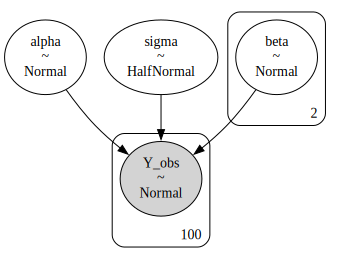

In [6]:
basic_model = Model()

with basic_model:
    
    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=5)
    beta = Normal('beta', mu=0, sd=5, shape=2)
    sigma = HalfNormal('sigma', sd=4)
    
    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2
    
    # Deterministic varvariable, to have PyMC3 store mus as a value in the trace use
    # mu = pm.Deterministic('mu', alpha + beta[0]*X1 + beta[1]*X2)
    
    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)
    
pm.model_to_graphviz(basic_model)

In [7]:
# In Bayesian statistics, a maximum a posteriori probability (MAP) estimate is an
# estimate of an unknown quantity, that equals the mode of the posterior distribution.
# The MAP can be used to obtain a point estimate of an unobserved quantity on the
# basis of empirical data.

map_estimate = find_MAP(model=basic_model, maxeval=10000)
map_estimate

{'alpha': array(1.0154193),
 'beta': array([1.46379432, 0.29275886]),
 'sigma_log__': array(0.12023688),
 'sigma': array(1.12776396)}